In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
# Import stats from scipy library
from scipy import stats
import statsmodels.api as sm


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [93]:
flights_fe = pd.read_csv(r"../data/2_featue_engineered/2_percent.csv")

In [94]:
flights_fe.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,arr_date_time,dep_date_time,arr_month,origin_airport_type,dest_airport_type,inbound_flights,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,Locid,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,num_runways_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,num_runways_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity
0,2019-01-02,DL,DL_CODESHARE,DL,5303,9E,N606LR,5303,10397,ATL,"Atlanta, GA",10135,ABE,"Allentown/Bethlehem/Easton, PA",1513,1510.0,-3.0,19.0,1529.0,1655.0,2.0,1714,1657.0,-17.0,0.0,NaN,0.0,N,121.0,107.0,86.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 17:14:00,2019-01-02 15:13:00,1,Very Large,Large,2,1,0,GA,PA,21234846.0,21234846.0,ATL,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,1,2,15,Rain,Light,Rain,Light
1,2019-03-26,DL,DL_CODESHARE,DL,5454,9E,N914XJ,5454,10397,ATL,"Atlanta, GA",10135,ABE,"Allentown/Bethlehem/Easton, PA",1025,1023.0,-2.0,14.0,1037.0,1213.0,3.0,1228,1216.0,-12.0,0.0,NaN,0.0,N,123.0,113.0,96.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-26 12:28:00,2019-03-26 10:25:00,3,Very Large,Large,0,0,0,GA,PA,21234846.0,21234846.0,ATL,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,1,12,3,1,10,Rain,Light,Rain,Moderate
2,2019-04-17,DL,DL_CODESHARE,DL,5443,9E,N901XJ,5443,10397,ATL,"Atlanta, GA",10135,ABE,"Allentown/Bethlehem/Easton, PA",1509,1504.0,-5.0,17.0,1521.0,1651.0,4.0,1718,1655.0,-23.0,0.0,NaN,0.0,N,129.0,111.0,90.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-17 17:18:00,2019-04-17 15:09:00,4,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,ATL,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,4,2,15,Rain,Light,Rain,Light
3,2019-05-12,DL,DL_CODESHARE,DL,5371,9E,N197PQ,5371,10397,ATL,"Atlanta, GA",10135,ABE,"Allentown/Bethlehem/Easton, PA",1025,1026.0,1.0,20.0,1046.0,1218.0,15.0,1228,1233.0,5.0,0.0,NaN,0.0,N,123.0,127.0,92.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-12 12:28:00,2019-05-12 10:25:00,5,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,ATL,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,6,12,5,6,10,Rain,Light,Rain,Light
4,2019-06-09,DL,DL_CODESHARE,DL,5197,9E,N916XJ,5197,10397,ATL,"Atlanta, GA",10135,ABE,"Allentown/Bethlehem/Easton, PA",1506,1641.0,95.0,18.0,1659.0,1833.0,7.0,1718,1840.0,82.0,0.0,NaN,0.0,N,132.0,119.0,94.0,1.0,692.0,6.0,0.0,0.0,0.0,76.0,NaN,NaN,NaN,NaN,2019-06-09 17:18:00,2019-06-09 15:06:00,6,Very Large,Large,1,0,0,GA,PA,21234846.0,21234846.0,ATL,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505

In [96]:
def fill_avg_delays(data):
    data["avg_weather_delay"] = data.weather_delay.mean()
    data["avg_nas_delay"] = data.nas_delay.mean()
    data["avg_security_delay"] = data.security_delay.mean()
    data["avg_late_aircraft_delay"] = data.late_aircraft_delay.mean()
    
    return data

In [98]:
flights_fe = flights_fe.groupby(by=["arr_month","op_unique_carrier"]).apply(fill_avg_delays)

In [99]:
flights_fe.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'arr_date_time', 'dep_date_time',
       'arr_month', 'origin_airport_type', 'dest_airport_type',
       'inbound_flights', 'dep_flights_count', 'arr_flights_count',
       'origin_state', 'dest_state', 'origin_population', 'dest_population',
       'Locid', 'C

## Target variable

<AxesSubplot:ylabel='arr_delay'>

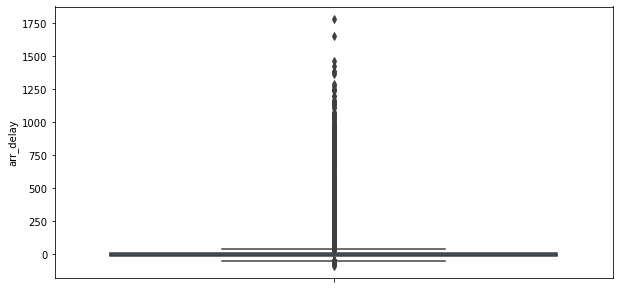

In [100]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(y=flights_fe.arr_delay)

In [101]:
100*flights_fe.arr_delay.isna().sum()/flights_fe.shape[0]

2.0943555292977436

In [102]:
# drop outliers
flights_fe = flights_fe[~flights_fe.arr_delay.isna()]
flights_fe.arr_delay.isna().sum()/flights_fe.shape[0]

0.0

In [103]:
# Interquartile range (IQR)
IQR = stats.iqr(flights_fe.arr_delay, interpolation = 'midpoint')

# First quartile (Q1)
Q1 = np.percentile(flights_fe.arr_delay, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(flights_fe.arr_delay, 75, interpolation = 'midpoint')
  
print(IQR)

22.0


In [104]:
flights_fe = flights_fe[(flights_fe.arr_delay<(Q3 + 1.5*IQR)) & (flights_fe.arr_delay>(Q1 - 1.5*IQR))]

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


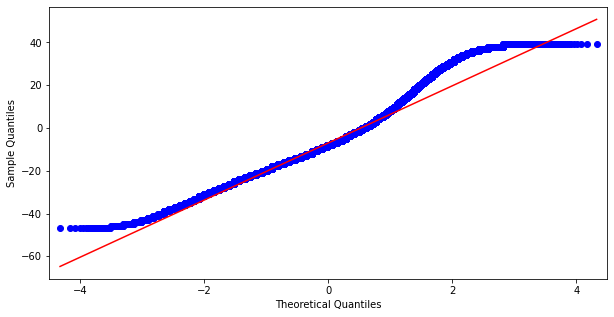

In [105]:
sm.qqplot(data=flights_fe.arr_delay,line='q')
plt.show()

<AxesSubplot:ylabel='arr_delay'>

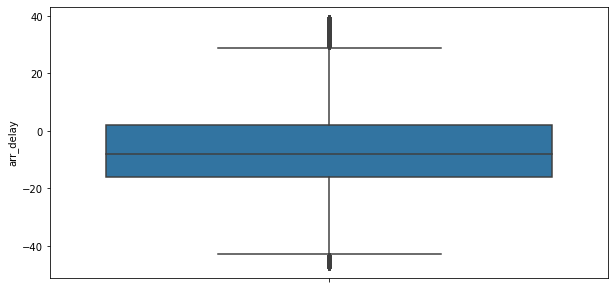

In [106]:
sns.boxplot(y=flights_fe.arr_delay)

In [107]:
flights_fe.shape

(132665, 93)

In [108]:
flights_fe.to_csv("train_data_Akhmet_v2.csv",index=False)

## Missing values

In [109]:
(flights_fe.isna().sum()).sort_values(ascending=False).head(15)

cancellation_code      132665
no_name                132665
first_dep_time         132463
longest_add_gtime      132463
total_add_gtime        132463
weather_delay          119116
carrier_delay          119116
late_aircraft_delay    119116
security_delay         119116
nas_delay              119116
dep_severity             3936
dep_type                 3936
arr_severity             3859
arr_type                 3859
area_or                   163
dtype: int64

In [110]:
drop_columns = (flights_fe.isna().sum()).sort_values(ascending=False).head(10).index.values

In [111]:
flights_fe = flights_fe.drop(columns=drop_columns)

In [112]:
(flights_fe.isna().sum()).sort_values(ascending=False).head(10)

dep_severity          3936
dep_type              3936
arr_severity          3859
arr_type              3859
area_or                163
area_des               159
hub_type_or             42
hub_type_des            28
CY 19 Enplanements      27
Rank_or                 27
dtype: int64

<AxesSubplot:xlabel='dep_severity', ylabel='count'>

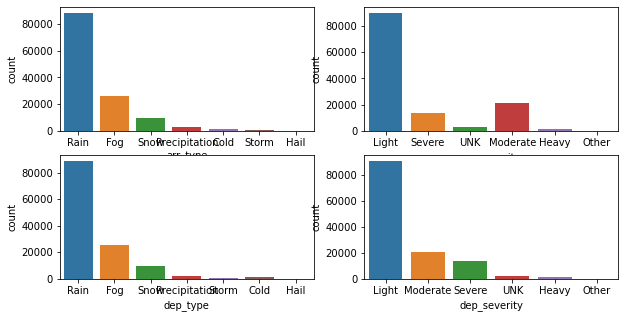

In [113]:
fig,axs = plt.subplots(2,2)
sns.countplot(x=flights_fe.arr_type,ax=axs[0][0])
sns.countplot(x=flights_fe.arr_severity,ax=axs[0][1])
sns.countplot(x=flights_fe.dep_type,ax=axs[1][0])
sns.countplot(x=flights_fe.dep_severity,ax=axs[1][1])

In [114]:
flights_fe.arr_type = flights_fe.arr_type.fillna(flights_fe.arr_type.describe().top)
flights_fe.arr_severity = flights_fe.arr_severity.fillna(flights_fe.arr_severity.describe().top)
flights_fe.dep_type = flights_fe.dep_type.fillna(flights_fe.dep_type.describe().top)
flights_fe.dep_severity = flights_fe.dep_severity.fillna(flights_fe.dep_severity.describe().top)

In [115]:
(flights_fe.isna().sum()).sort_values(ascending=False).head(10)

area_or               163
area_des              159
hub_type_or            42
hub_type_des           28
Rank_or                27
Locid                  27
CY 19 Enplanements     27
beacon_color_or        26
beacon_color_des       20
Rank_des               20
dtype: int64

In [116]:
flights_fe.dest[flights_fe.area_des.isna()].unique()

array(['GRK', 'SIT', 'ADQ', 'OME', 'DUT', 'BRW', 'PSG', 'YAK', 'WRG'],
      dtype=object)

In [117]:
flights_fe.origin[flights_fe.area_or.isna()].unique()

array(['GRK', 'SIT', 'ADQ', 'BRW', 'OME', 'ADK', 'DUT', 'PSG', 'YAK',
       'WRG'], dtype=object)

In [118]:
flights_fe.dest[flights_fe.hub_type_des.isna()].unique()

array(['JHM', 'DVL'], dtype=object)

In [119]:
flights_fe = flights_fe.dropna()
flights_fe.shape

(132280, 83)

## Preprocessing

In [189]:
flights_dropped = flights_fe.copy()

In [190]:
flights_fe.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'arr_date_time', 'dep_date_time', 'arr_month',
       'origin_airport_type', 'dest_airport_type', 'inbound_flights',
       'dep_flights_count', 'arr_flights_count', 'origin_state', 'dest_state',
       'origin_population', 'dest_population', 'Locid', 'CY 19 Enplanements',
       'service_level_or', 'hub_type_or', 'ownership_status_or',
       'facility_use_or', 'area_or', 'fss_on_airport_or', 'beacon_color_or',
       'total_operations_annual_or', 'num_ru

In [191]:
test_columns = ["mkt_unique_carrier","branded_code_share",
               "mkt_carrier","mkt_carrier_fl_num",
               "op_unique_carrier","tail_num","op_carrier_fl_num",
               "origin_airport_id","origin","origin_city_name",
               "dest_airport_id","dest","dest_city_name","crs_elapsed_time",
               "flights","distance","arr_delay","dep_delay"]

weather_features = ['arr_type','arr_severity', 'dep_type', 'dep_severity']

population_features = ['origin_population','dest_population']

timing_features = ['arr_date_time', 'dep_date_time', 'arr_month','arr_day_of_week', 'arr_hour','dep_month', 'dep_day_of_week', 'dep_hour']

or_airport_features = ['service_level_or','hub_type_or', 'ownership_status_or', 'facility_use_or', 'area_or',
                    'fss_on_airport_or', 'beacon_color_or', 'total_operations_annual_or','num_runways_or', 
                    'avg_runway_length_or', 'avg_runway_width_or','Rank_or','CY 19 Enplanements']

dest_airport_features = ['service_level_des', 'hub_type_des', 'ownership_status_des','facility_use_des', 'area_des', 
                         'fss_on_airport_des','beacon_color_des', 'total_operations_annual_des', 'num_runways_des',
                         'avg_runway_length_des', 'avg_runway_width_des', 'Rank_des']

from_data = ['origin_airport_type','dest_airport_type', 'inbound_flights', 
             'dep_flights_count','arr_flights_count', 'origin_state', 'dest_state']

avg_delays = ['avg_weather_delay','avg_nas_delay','avg_security_delay','avg_late_aircraft_delay']


features_to_keep = test_columns+weather_features+population_features+timing_features+or_airport_features+dest_airport_features+from_data+avg_delays

columns_to_drop = set(flights_dropped.columns).difference(set(features_to_keep))
flights_dropped = flights_dropped.drop(columns=columns_to_drop)

In [192]:
repetitive_columns = ["branded_code_share","mkt_carrier","tail_num","mkt_carrier_fl_num",
                      "origin_airport_id","dest_airport_id","flights"]
flights_dropped = flights_dropped.drop(columns=repetitive_columns)

In [193]:
flights_dropped  = flights_dropped.drop(columns=["arr_date_time","dep_date_time"])
flights_dropped.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,dep_delay,arr_delay,crs_elapsed_time,distance,arr_month,origin_airport_type,dest_airport_type,inbound_flights,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,num_runways_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,num_runways_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,DL,9E,5303,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",-3.0,-17.0,121.0,692.0,1,Very Large,Large,2,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,1,2,15,Rain,Light,Rain,Light,1.415584,29.363636,0.0,33.896104
1,DL,9E,5454,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",-2.0,-12.0,123.0,692.0,3,Very Large,Large,0,0,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,1,12,3,1,10,Rain,Light,Rain,Moderate,1.602564,8.461538,0.0,27.076923
2,DL,9E,5443,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",-5.0,-23.0,129.0,692.0,4,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,4,2,15,Rain,Light,Rain,Light,0.645161,23.129032,0.0,24.870968
3,DL,9E,5371,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",1.0,5.0,123.0,692.0,5,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,6,12,5,6,10,Rain,Light,Rain,Light,1.454545,23.922078,0.0,30.311688
6,DL,9E,5197,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",-8.0,-29.0,132.0,692.0,8,Very Large,Large,1,4,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,0,17,8,0,15,Rain,Light,Rain,Light,2.084337,25.759036,0.0,29.867470


In [194]:
flights_dropped = flights_dropped.drop(columns=["dest_city_name","dest","origin","origin_city_name"])
flights_dropped.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,dep_delay,arr_delay,crs_elapsed_time,distance,arr_month,origin_airport_type,dest_airport_type,inbound_flights,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,num_runways_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,num_runways_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,DL,9E,5303,-3.0,-17.0,121.0,692.0,1,Very Large,Large,2,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,1,2,15,Rain,Light,Rain,Light,1.415584,29.363636,0.0,33.896104
1,DL,9E,5454,-2.0,-12.0,123.0,692.0,3,Very Large,Large,0,0,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,1,12,3,1,10,Rain,Light,Rain,Moderate,1.602564,8.461538,0.0,27.076923
2,DL,9E,5443,-5.0,-23.0,129.0,692.0,4,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,4,2,15,Rain,Light,Rain,Light,0.645161,23.129032,0.0,24.870968
3,DL,9E,5371,1.0,5.0,123.0,692.0,5,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,6,12,5,6,10,Rain,Light,Rain,Light,1.454545,23.922078,0.0,30.311688
6,DL,9E,5197,-8.0,-29.0,132.0,692.0,8,Very Large,Large,1,4,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,0,17,8,0,15,Rain,Light,Rain,Light,2.084337,25.759036,0.0,29.867470


In [195]:
flights_dropped.columns

Index(['mkt_unique_carrier', 'op_unique_carrier', 'op_carrier_fl_num',
       'dep_delay', 'arr_delay', 'crs_elapsed_time', 'distance', 'arr_month',
       'origin_airport_type', 'dest_airport_type', 'inbound_flights',
       'dep_flights_count', 'arr_flights_count', 'origin_state', 'dest_state',
       'origin_population', 'dest_population', 'CY 19 Enplanements',
       'service_level_or', 'hub_type_or', 'ownership_status_or',
       'facility_use_or', 'area_or', 'fss_on_airport_or', 'beacon_color_or',
       'total_operations_annual_or', 'num_runways_or', 'avg_runway_length_or',
       'avg_runway_width_or', 'Rank_or', 'service_level_des', 'hub_type_des',
       'ownership_status_des', 'facility_use_des', 'area_des',
       'fss_on_airport_des', 'beacon_color_des', 'total_operations_annual_des',
       'num_runways_des', 'avg_runway_length_des', 'avg_runway_width_des',
       'Rank_des', 'arr_day_of_week', 'arr_hour', 'dep_month',
       'dep_day_of_week', 'dep_hour', 'arr_type', 'ar

## Modelling

In [196]:
flights_modelling = flights_dropped.copy()

In [197]:
X,y = flights_modelling.drop(columns=["arr_delay"]), flights_modelling["arr_delay"]

In [198]:
X.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,dep_delay,crs_elapsed_time,distance,arr_month,origin_airport_type,dest_airport_type,inbound_flights,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,num_runways_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,num_runways_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,DL,9E,5303,-3.0,121.0,692.0,1,Very Large,Large,2,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,1,2,15,Rain,Light,Rain,Light,1.415584,29.363636,0.0,33.896104
1,DL,9E,5454,-2.0,123.0,692.0,3,Very Large,Large,0,0,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,1,12,3,1,10,Rain,Light,Rain,Moderate,1.602564,8.461538,0.0,27.076923
2,DL,9E,5443,-5.0,129.0,692.0,4,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,2,17,4,2,15,Rain,Light,Rain,Light,0.645161,23.129032,0.0,24.870968
3,DL,9E,5371,1.0,123.0,692.0,5,Very Large,Large,1,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,6,12,5,6,10,Rain,Light,Rain,Light,1.454545,23.922078,0.0,30.311688
6,DL,9E,5197,-8.0,132.0,692.0,8,Very Large,Large,1,4,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,5,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,2,6699.5,150.0,143.0,0,17,8,0,15,Rain,Light,Rain,Light,2.084337,25.759036,0.0,29.867470


In [199]:
X.shape

(132280, 54)

## Polynomial features

In [200]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [201]:
# original version had class ColumnExtractor(object)
# estimators need to inherit from these classes to play nicely with others
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_cols = X[self.columns]
        return X_cols

In [202]:
cols_to_poly = ["distance","inbound_flights","num_runways_des","num_runways_or"]
remaining_columns = [col for col in X.columns if col not in cols_to_poly]

In [203]:
len(remaining_columns)

50

In [204]:
poly = PolynomialFeatures()

In [205]:
# Using pandas get dummies to make pipeline a bit simpler by
# avoiding one-hot and label encoder.     
# Build the pipeline from a FeatureUnion that processes 
# numerical and one-hot encoded separately.
# FeatureUnion puts them back together when it's done.
pipe2nvars = Pipeline([
    ('features', FeatureUnion([('num', 
                                Pipeline([('extract', 
                                           ColumnExtractor(columns=cols_to_poly)),
                                          ('poly', 
                                           poly)  ])),
                               ('cat_var', 
                                ColumnExtractor(columns=remaining_columns))])
    )])   

In [206]:
pipe2nvars.set_params(features__num__poly__degree=2)
X = pd.DataFrame(pipe2nvars.fit_transform(X))

In [207]:
cols = poly.get_feature_names(input_features=cols_to_poly)+remaining_columns
cols = dict(zip(range(X.shape[1]),cols))
X = X.rename(columns=cols)

In [208]:
X.head()

,1,distance,inbound_flights,num_runways_des,num_runways_or,distance^2,distance inbound_flights,distance num_runways_des,distance num_runways_or,inbound_flights^2,inbound_flights num_runways_des,inbound_flights num_runways_or,num_runways_des^2,num_runways_des num_runways_or,num_runways_or^2,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,dep_delay,crs_elapsed_time,arr_month,origin_airport_type,dest_airport_type,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,1.0,692.0,2.0,2.0,5.0,478864.0,1384.0,1384.0,3460.0,4.0,4.0,10.0,4.0,10.0,25.0,DL,9E,5303,-3.0,121.0,1,Very Large,Large,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,6699.5,150.0,143.0,2,17,1,2,15,Rain,Light,Rain,Light,1.415584,29.363636,0.0,33.896104
1,1.0,692.0,0.0,2.0,5.0,478864.0,0.0,1384.0,3460.0,0.0,0.0,0.0,4.0,10.0,25.0,DL,9E,5454,-2.0,123.0,3,Very Large,Large,0,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,6699.5,150.0,143.0,1,12,3,1,10,Rain,Light,Rain,Moderate,1.602564,8.461538,0.0,27.076923
2,1.0,692.0,1.0,2.0,5.0,478864.0,692.0,1384.0,3460.0,1.0,2.0,5.0,4.0,10.0,25.0,DL,9E,5443,-5.0,129.0,4,Very Large,Large,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,6699.5,150.0,143.0,2,17,4,2,15,Rain,Light,Rain,Light,0.645161,23.129032,0.0,24.870968
3,1.0,692.0,1.0,2.0,5.0,478864.0,692.0,1384.0,3460.0,1.0,2.0,5.0,4.0,10.0,25.0,DL,9E,5371,1.0,123.0,5,Very Large,Large,1,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,6699.5,150.0,143.0,6,12,5,6,10,Rain,Light,Rain,Light,1.454545,23.922078,0.0,30.311688
4,1.0,692.0,1.0,2.0,5.0,478864.0,692.0,1384.0,3460.0,1.0,2.0,5.0,4.0,10.0,25.0,DL,9E,5197,-8.0,132.0,8,Very Large,Large,4,0,GA,PA,21234846.0,21234846.0,53505795.0,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,9877.8,150.0,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,6699.5,150.0,143.0,0,17,8,0,15,Rain,Light,Rain,Light,2.084337,25.759036,0.0,29.86747


## One hot encoding

In [209]:
X_dummy = X.drop(columns=["op_carrier_fl_num","crs_elapsed_time",
                          'origin_airport_type','dest_airport_type',
                          'arr_severity', 'dep_type', 'dep_severity'
                         ])

In [210]:
X_dummy = pd.get_dummies(
    data=X_dummy,columns=["mkt_unique_carrier","op_unique_carrier"])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['arr_month','arr_day_of_week', 'arr_hour',
                          'dep_month', 'dep_day_of_week', 'dep_hour',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['service_level_or','hub_type_or', 'ownership_status_or', 'facility_use_or','fss_on_airport_or','beacon_color_or',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['hub_type_des', 'ownership_status_des','facility_use_des', 'fss_on_airport_des','beacon_color_des','service_level_des',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['origin_state', 'dest_state',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['arr_type'])      

X_dummy.shape

(132280, 293)

In [211]:
X_dummy.columns

Index(['1', 'distance', 'inbound_flights', 'num_runways_des', 'num_runways_or',
       'distance^2', 'distance inbound_flights', 'distance num_runways_des',
       'distance num_runways_or', 'inbound_flights^2',
       ...
       'dest_state_WI', 'dest_state_WV', 'dest_state_WY', 'arr_type_Cold',
       'arr_type_Fog', 'arr_type_Hail', 'arr_type_Precipitation',
       'arr_type_Rain', 'arr_type_Snow', 'arr_type_Storm'],
      dtype='object', length=293)

In [212]:
pd.set_option('display.max_columns', None)
X_dummy.head()

,1,distance,inbound_flights,num_runways_des,num_runways_or,distance^2,distance inbound_flights,distance num_runways_des,distance num_runways_or,inbound_flights^2,inbound_flights num_runways_des,inbound_flights num_runways_or,num_runways_des^2,num_runways_des num_runways_or,num_runways_or^2,dep_delay,dep_flights_count,arr_flights_count,origin_population,dest_population,CY 19 Enplanements,area_or,total_operations_annual_or,avg_runway_length_or,avg_runway_width_or,Rank_or,area_des,total_operations_annual_des,avg_runway_length_des,avg_runway_width_des,Rank_des,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN,op_unique_carrier_9E,op_unique_carrier_AA,op_unique_carrier_AS,op_unique_carrier_AX,op_unique_carrier_B6,op_unique_carrier_C5,op_unique_carrier_CP,op_unique_carrier_DL,op_unique_carrier_EM,op_unique_carrier_EV,op_unique_carrier_F9,op_unique_carrier_G4,op_unique_carrier_G7,op_unique_carrier_HA,op_unique_carrier_MQ,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,arr_month_1,arr_month_2,arr_month_3,arr_month_4,arr_month_5,arr_month_6,arr_month_7,arr_month_8,arr_month_9,arr_month_10,arr_month_11,arr_month_12,arr_day_of_week_0,arr_day_of_week_1,arr_day_of_week_2,arr_day_of_week_3,arr_day_of_week_4,arr_day_of_week_5,arr_day_of_week_6,arr_hour_0,arr_hour_1,arr_hour_2,arr_hour_3,arr_hour_4,arr_hour_5,arr_hour_6,arr_hour_7,arr_hour_8,arr_hour_9,arr_hour_10,arr_hour_11,arr_hour_12,arr_hour_13,arr_hour_14,arr_hour_15,arr_hour_16,arr_hour_17,arr_hour_18,arr_hour_19,arr_hour_20,arr_hour_21,arr_hour_22,arr_hour_23,dep_month_1,dep_month_2,dep_month_3,dep_month_4,dep_month_5,dep_month_6,dep_month_7,dep_month_8,dep_month_9,dep_month_10,dep_month_11,dep_month_12,dep_day_of_week_0,dep_day_of_week_1,dep_day_of_week_2,dep_day_of_week_3,dep_day_of_week_4,dep_day_of_week_5,dep_day_of_week_6,dep_hour_0,dep_hour_1,dep_hour_2,dep_hour_3,dep_hour_4,dep_hour_5,dep_hour_6,dep_hour_7,dep_hour_8,dep_hour_9,dep_hour_10,dep_hour_11,dep_hour_12,dep_hour_13,dep_hour_14,dep_hour_15,dep_hour_16,dep_hour_17,dep_hour_18,dep_hour_19,dep_hour_20,dep_hour_21,dep_hour_22,dep_hour_23,service_level_or_Primary,hub_type_or_Large,hub_type_or_Medium,hub_type_or_Non-Hub,hub_type_or_Small,ownership_status_or_AIR FORCE,ownership_status_or_NAVY,ownership_status_or_PUBLIC,facility_use_or_PUBLIC,fss_on_airport_or_NO,fss_on_airport_or_YES,beacon_color_or_Clear and Green,hub_type_des_Large,hub_type_des_Medium,hub_type_des_Non-Hub,hub_type_des_Small,ownership_status_des_AIR FORCE,ownership_status_des_NAVY,ownership_status_des_PUBLIC,facility_use_des_PUBLIC,fss_on_airport_des_NO,fss_on_airport_des_YES,beacon_color_des_Clear and Green,service_level_des_Primary,origin_state_AK,origin_state_AL,origin_state_AR,origin_state_AZ,origin_state_CA,origin_state_CO,origin_state_CT,origin_state_DC,origin_state_FL,origin_state_GA,origin_state_HI,origin_state_IA,origin_state_ID,origin_state_IL,origin_state_IN,origin_state_KS,origin_state_KY,origin_state_LA,origin_state_MA,origin_state_MD,origin_state_ME,origin_state_MI,origin_state_MN,origin_state_MO,origin_state_MS,origin_state_MT,origin_state_NC,origin_state_ND,origin_state_NE,origin_state_NH,origin_state_NJ,origin_state_NM,origin_state_NV,origin_state_NY,origin_state_OH,origin_state_OK,origin_state_OR,origin_state_PA,origin_state_PR,origin_state_RI,origin_state_SC,origin_state_SD,origin_state_TN,origin_state_TT,origin_state_TX,origin_state_UT,origin_state_VA,origin_state_VI,origin_state_VT,origin_state_WA,origin_state_WI,origin_state_WV,origin_state_WY,dest_state_AK,dest_state_AL,dest_state_AR,dest_state_AZ,dest_state_CA,dest_state_CO,dest_state_

### Scaling features

In [213]:
# # scaler= StandardScaler()
# scaler = MinMaxScaler()

In [214]:
# X_dummy = pd.DataFrame(scaler.fit_transform(X=X_dummy),columns=X_dummy.columns)

In [215]:
# X_dummy.shape

## Feature Importance

In [216]:

#transformation
#scale features

# polynomial regression
# p-value for coefficients

#

In [217]:
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,train_size=0.7,random_state=1234)

In [218]:
X_train.shape

(92596, 293)

### selecting features by p-value

In [238]:
X_train.shape

(92596, 293)

In [239]:
reg = LinearRegression()
model = GridSearchCV(reg,param_grid={})
model.fit(X_train.dep_delay.values.reshape(-1,1),y_train)

GridSearchCV(estimator=LinearRegression(), param_grid={})

In [241]:
y_pred = model.predict(X_test.dep_delay.values.reshape(-1,1))

In [242]:
print(r2_score(y_test,y_pred))

0.43073801994791794


In [2]:
flights = pd.read_csv(r"../data/flights_2019.csv")

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

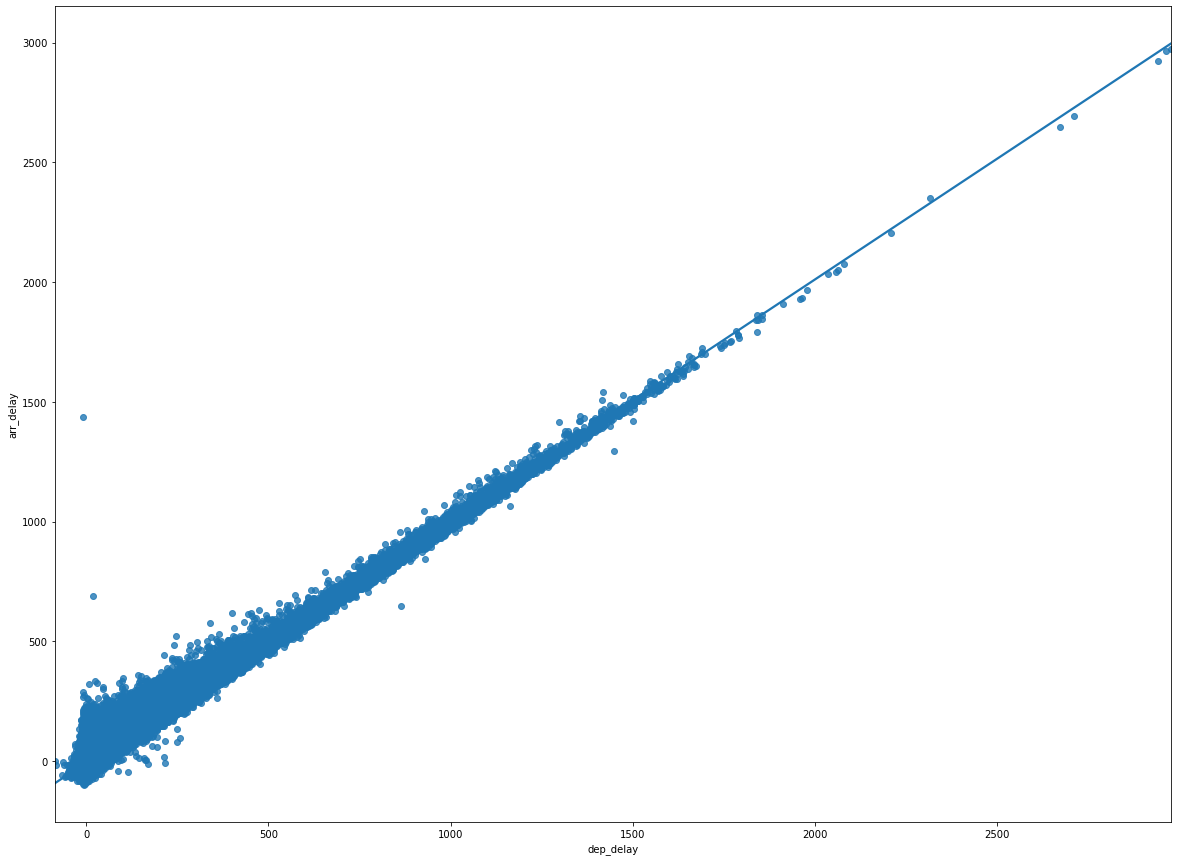

In [7]:
plt.rcParams["figure.figsize"] = (20,15)
fig,axs = plt.subplots(1,1)
sns.regplot(x=flights.dep_delay,y=flights.arr_delay,ax=axs)

In [8]:
fig.savefig("regresssion.jpeg")